<a href="https://colab.research.google.com/github/neohack22/IASD/blob/DeepLearning/Regression_The_Boston_Housing_Price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Predict the median price of homes in a given Boston suburb in the mid-1970s, given data points
about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The
dataset you’ll use has an interesting difference from the two previous examples. It has relatively
few data points: only 506, split between 404 training samples and 102 test samples. And each
feature in the input data (for example, the crime rate) has a different scale. For instance, some
values are proportions, which take values between 0 and 1; others take values between 1 and
12, others between 0 and 100, and so on.

In [0]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = \
boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 2us/step


# Train a small dense network on the Boston Housing data

## Encode the data

### Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. </br>The network might
be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. </br>A
widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation,
so that the feature is centered around 0 and has a unit standard deviation. </br>This is easily done in Numpy.

#### SyntaxError: invalid syntax

In [0]:
mean = train_datatrain_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

SyntaxError: ignored

#### Preparing the data 1.1

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your network

Because so few samples are available, you’ll use a very small network with two hidden layers, each
with 64 units. </br>In general, the less training data you have, the worse overfitting will be, and using a
small network is one way to mitigate overfitting.

In [0]:
from keras import models
from keras import layers

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', \
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

### 3-fold cross-validation

In [0]:
import numpy as np

#### NameError: name 'all_score' is not defined

In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = \
np.concatenate([train_data[:i * num_val_samples], \
                train_data[(i + 1) * num_val_samples:]], axis=0)
partial_train_targets = \
np.concatenate([train_targets[:i * num_val_samples], \
                train_targets[(i + 1) * num_val_samples:]], axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets, \
          epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_score.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3














NameError: ignored

In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = \
np.concatenate([train_data[:i * num_val_samples], \
                train_data[(i + 1) * num_val_samples:]], axis=0)
partial_train_targets = \
np.concatenate([train_targets[:i * num_val_samples], \
                train_targets[(i + 1) * num_val_samples:]], axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets, \
          epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_score.append(val_mae)

#### 3-fold cross-validation 1.1

In [0]:
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data =\
  np.concatenate([train_data[:i * num_val_samples], \
                  train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = \
  np.concatenate([train_targets[:i * num_val_samples],\
                  train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, \
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
num_epochs_1 = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data_1 = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets_1 = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data_1 = \
  np.concatenate([train_data[:i * num_val_samples],\
                  train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets_1 = \
  np.concatenate([train_targets[:i * num_val_samples],\
                  train_targets[(i + 1) * num_val_samples:]], axis=0)
  model_1 = build_model()
  history_1 = model.fit(partial_train_data_1, partial_train_targets_1,\
                        validation_data=(val_data_1, val_targets_1),\
                        epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history_1.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
average_mae_history = [\
                       np.mean([x[i] for x in all_mae_histories]) for i in \
                       range(num_epochs)]

In [0]:
import matplotlib.pyplot as plt

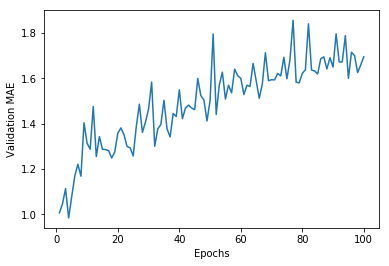

In [0]:
plt.plot(range(1, len(average_mae_history) + 1),\
               average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Once you’re finished tuning other parameters of the model (in addition to the
number of epochs, you could also adjust the size of the hidden layers), you can train
a final production model on all of the training data, with the best parameters, and
then look at its performance on the test data.

In [0]:
model_2 = build_model()

model_2.fit(train_data, train_targets,\
            epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 65us/step
